The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. The dataset will be used to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [ ]:
!pip install google

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/dataset/medical_examination.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#adding an overweight column, considering that the threshold is a BMI>25, so 1 is overweight and 0 not overweight
df['bmi'] = df['weight']/((df['height']/100)**2)
df['overweight'] = np.where(df['bmi']>25,1,0)

In [ ]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


In [ ]:
"""normalizing the data to binary format where 0 is good and 1 is bad, for the
cholesterol and glucose any value greater than 1 is considered bad"""

df['cholesterol'] = np.where(df['cholesterol']>1,1,0)
df['gluc'] = np.where(df['gluc']>1,1,0)


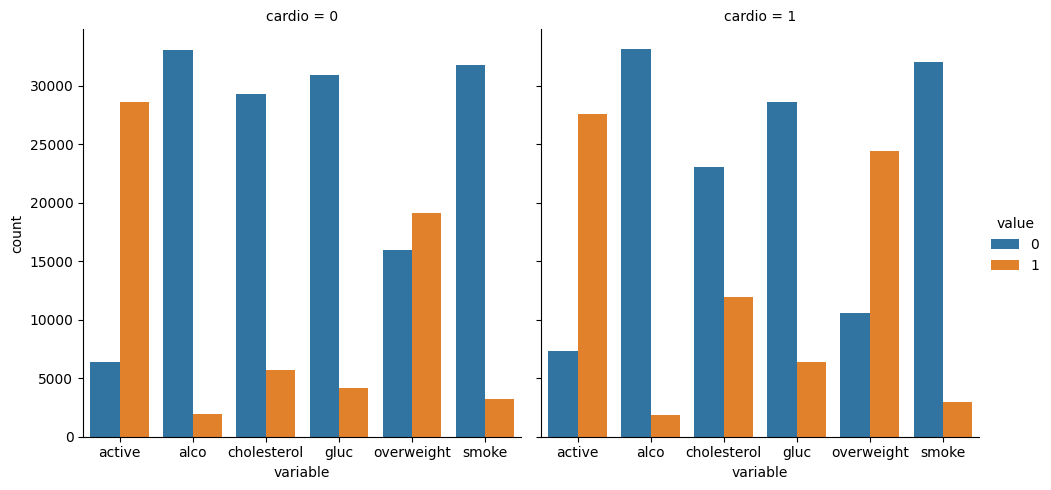

In [ ]:
""" transforming the data to a long format, in this case
the wide format will be kept and a new dataframe will be created"""

df2 = df[['cardio','cholesterol','gluc','alco','active','smoke','overweight']]
df_long = df2.melt(id_vars = 'cardio')
a = sns.catplot(data=df_long, x = 'variable', col = 'cardio', hue='value', kind = 'count', order = ['active','alco','cholesterol','gluc','overweight','smoke'])
plt.show()



In [ ]:
""" Filtereing the segments tha contain incorect Data
-diastolic pressure is higher than systolic
-height is less than the 2.5th percentile
-height is more than the 97.5th percentile
-weight is less than the 2.5th percentile
-weight is more than the 97.5th percentile
"""
#diastolic pressure
df = df[df["ap_lo"]<=df['ap_hi']]
#height
df = df[df['height']>=df['height'].quantile(0.025)]
df = df[df['height']<= df['height'].quantile(0.975)]
#weight
df = df[df['weight']>=df['weight'].quantile(0.025)]
df = df[df['weight']<= df['weight'].quantile(0.975)]




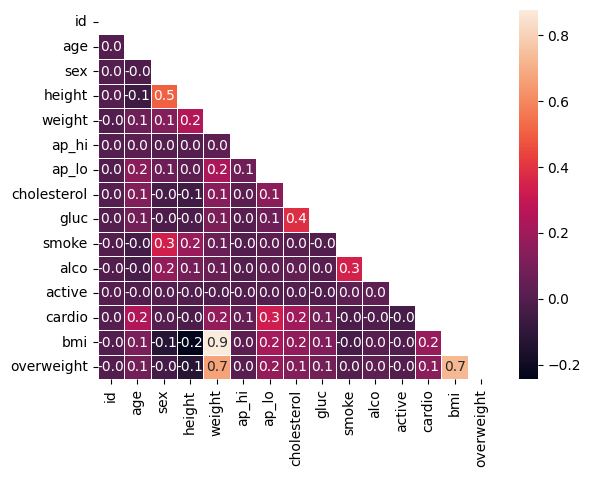

In [ ]:
#creating a heatmap
#creating the mask to show only the bottom half
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot = True, linewidths=.5, mask = mask, fmt='.1f')
plt.show()